# Speaker Recommender System (Notebook)

This notebook contains the first development of the speaker recommender system. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Big-Picture" data-toc-modified-id="Big-Picture-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Big Picture</a></span></li><li><span><a href="#Data-Collection-/-Web-Scaping" data-toc-modified-id="Data-Collection-/-Web-Scaping-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Collection / Web Scaping</a></span><ul class="toc-item"><li><span><a href="#Names,-Prices,-URLs" data-toc-modified-id="Names,-Prices,-URLs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Names, Prices, URLs</a></span></li><li><span><a href="#Product-Specifications" data-toc-modified-id="Product-Specifications-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Product Specifications</a></span></li></ul></li><li><span><a href="#Data-Probing-&amp;-Cleaning" data-toc-modified-id="Data-Probing-&amp;-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Probing &amp; Cleaning</a></span></li><li><span><a href="#Mapping-Specs-to-Vecs" data-toc-modified-id="Mapping-Specs-to-Vecs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mapping Specs to Vecs</a></span><ul class="toc-item"><li><span><a href="#Example-Mapping" data-toc-modified-id="Example-Mapping-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Example Mapping</a></span></li><li><span><a href="#Map-All-&amp;-Explore" data-toc-modified-id="Map-All-&amp;-Explore-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Map All &amp; Explore</a></span></li><li><span><a href="#Post-Processing" data-toc-modified-id="Post-Processing-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Post-Processing</a></span></li><li><span><a href="#Feature-Normalization" data-toc-modified-id="Feature-Normalization-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Feature Normalization</a></span></li></ul></li><li><span><a href="#Visualizations-&amp;-Explorations" data-toc-modified-id="Visualizations-&amp;-Explorations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualizations &amp; Explorations</a></span><ul class="toc-item"><li><span><a href="#Visualizing-Vectors" data-toc-modified-id="Visualizing-Vectors-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Visualizing Vectors</a></span></li></ul></li><li><span><a href="#Recommender-System-Prototype" data-toc-modified-id="Recommender-System-Prototype-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Recommender System Prototype</a></span><ul class="toc-item"><li><span><a href="#Set-User-Likes/Dislikes" data-toc-modified-id="Set-User-Likes/Dislikes-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Set User Likes/Dislikes</a></span></li><li><span><a href="#Create-Preference-Vector" data-toc-modified-id="Create-Preference-Vector-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Create Preference Vector</a></span></li><li><span><a href="#Compare,-Rank,-Recommend" data-toc-modified-id="Compare,-Rank,-Recommend-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Compare, Rank, Recommend</a></span><ul class="toc-item"><li><span><a href="#Cosine-Similarity" data-toc-modified-id="Cosine-Similarity-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Cosine Similarity</a></span></li><li><span><a href="#Euclidean-Similarity" data-toc-modified-id="Euclidean-Similarity-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Euclidean Similarity</a></span></li></ul></li></ul></li><li><span><a href="#Preliminary-Validation" data-toc-modified-id="Preliminary-Validation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Preliminary Validation</a></span></li><li><span><a href="#Conclusions-&amp;-Outlook" data-toc-modified-id="Conclusions-&amp;-Outlook-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions &amp; Outlook</a></span></li></ul></div>

## Big Picture

The recommender system developed here shall hold a data frame of several different public address (PA) speaker products and their specifications. The user interacts with the system by providing/selecting a list of products which are liked and disliked based on prior experience. The recommender system will then return ranked lists of new similar products. 

In the background, the recommender system will map product specs to vectors in a high-dimensional feature space, and compare available product vectors to a new vector constructed from user preferences. To compare vectors, the system will use Euclidean or Cosine similarity measures between vectors. 

## Data Collection / Web Scaping

First: teach yourself BeautifulSoup... (3 hours later) - Done & Ready

Here we first scrape a Guitar Center catalogue of PA speakers for basic info like name, price and url.
We are sure to kindly add sleeps to not overload the server. Below we shall access these pages individually to extract specification data.

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import time
import re
import ast

import matplotlib 
from matplotlib import pyplot as plt
%matplotlib notebook

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.firefox.options import Options

### Names, Prices, URLs

In [1]:
# Make dataframe to store core product info from catalog
df = pd.DataFrame(columns = ['name','url', 'price' , 'id'])

# Checked 21 pages online (with 90 listings each)
last_page = 20

# Loop over all pages and get basic info
for i in range(1,last_page + 1):
    
    page_key = 90*(i-1)
    url = 'https://www.guitarcenter.com/PA-Speakers.gc#pageName=subcategory-page&N=19616&Nao={}&recsPerPage=90&postalCode=28403&radius=100&profileCountryCode=US&profileCurrencyCode=USD'.format(page_key)
    
    print(url)
    
    # Firefox session
    driver = webdriver.Firefox(executable_path='/Users/tamiro/Desktop/Data Science/Speaker_Recommender/geckodriver')
    driver.get(url)
    driver.implicitly_wait(100)
        
    time.sleep(2.0)
    
    # Get page
    soup = BeautifulSoup(driver.page_source) 
    
    # Get inside grid
    grid = soup.find("div", {"class": "productGrid product-grid"}) 

    # Get inside product details
    products = grid.find_all("div", {"class": "productDetails"}) 
    
    # Go over product info and store in data frame
    for item in products:
        
        item_title = item.find("div", {"class":"productTitle"})
        item_name = item_title.find("a").get_text().replace('\n','')
        item_href = 'https://guitarcenter.com'+item_title.find("a")['href']
        item_id = item.find("var", {"class": re.compile("productId")}).get_text().split('site')[1]
        item_price = item.find("span", {"class": re.compile("productPrice")}).get_text().split('$')[1] 

        df = df.append(pd.Series({'name': item_name,'url':item_href, 'price':item_price, 'id': item_id}),ignore_index=True)
        
        print('name=',item_name)
    
    driver.close()
    
    print(i, ' of ', last_page)
    
# save data to file
# df.to_csv('GC.csv',index=False)

In [2]:
# load from csv into dataframe
df = pd.read_csv('GC.csv') 
df.head()

,name,url,price,id
0,"Harbinger VARI V2312 12"" 2,000W Powered Speake...",https://guitarcenter.com/Harbinger/VARI-V2312-...,249.99,51500000000250906
1,"Harbinger VARI V2315 15"" Powered Speaker with ...",https://guitarcenter.com/Harbinger/VARI-V2315-...,299.99,51500000000250907
2,"QSC K12.2 Powered 12"" 2-way Loudspeaker System...",https://guitarcenter.com/QSC/K122-Powered-12-2...,799.99,51500000000033476
3,"Open Box Harbinger VARI V1015 15"" Active Louds...",https://guitarcenter.com/Open-Box/Harbinger/Va...,131.99,51500000000024345
4,Kustom PA PA50 Personal PA System,https://guitarcenter.com/Kustom-PA/PA50-Person...,99.99,51305130020999581893


In [3]:
# Product & Price Info

print('\n total products:', len(df.index))
min_price =  df['price'].apply(lambda x : x.replace(',','')).astype(float).min()
max_price =  df['price'].apply(lambda x : x.replace(',','')).astype(float).max()
print('\n price range:', min_price, '-',max_price)


 total products: 1740

 price range: 24.99 - 4395.0


count    1740.000000
mean      445.528218
std       394.390663
min        24.990000
25%       189.990000
50%       323.990000
75%       549.990000
max      4395.000000
Name: price, dtype: float64

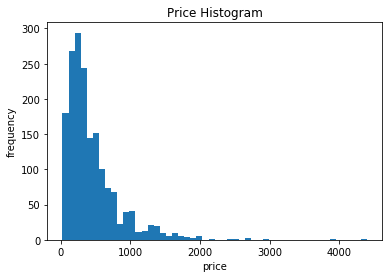

In [4]:
# Make Price Histogram & Show Stats

fig = plt.figure(0)

plt.hist(df['price'].apply(lambda x : x.replace(',','')).astype(float),bins=50);

plt.title('Price Histogram')
plt.xlabel('price')
plt.ylabel('frequency')

df['price'].apply(lambda x : x.replace(',','')).astype(float).describe()

### Product Specifications

In [5]:
# List to array
def Enquiry(lis1): 
    return(np.array(lis1)) 

# Define function that takes url and gets specs
def get_specs(url):
# for a single url get the specifications in a list of lists
# outermost list points to specification categories
# within each compartment, we have [category title , [list of specs for category] ] 
    
    d = []
    try:
        soup_prod = BeautifulSoup(requests.get(url,timeout=5).text)
        time.sleep(2.0)

        section = soup_prod.find('section', {'id': "product-specifications"})
    
        if section != None:

            print('There are specs!')

            spec_parts = [ item.get_text() for item in section.find_all('strong')]

            if (spec_parts != None) and (Enquiry(spec_parts).size):

                print('There are subcategories!')

                for part in spec_parts:

                    ## Make list of specs
                    ul = section.find("strong", string = part).next_sibling
                    li_list = ul.findAll('li')
                    part_list = [li.get_text() for li in li_list]
                    d.append([part,part_list])

                return d

            else:

                print('Specs are not categorized!')

                ul = section.find("ul")

                if ul != None:

                    ## make list of specs
                    li_list = ul.findAll('li')
                    spec_list = [li.get_text() for li in li_list]
                    d.append(['Raw Specs',spec_list])
                    
                    return d            

    except:
        
        pass
    
    print('Product with no specs!')
    return d

In [2]:
# Run a loop over the products and store spec lists as object in the dataframe 

iterator = df.index.values[:400]

df['Specs'] = ""
for i in iterator:
    
    spec_list = get_specs(df.loc[i,'url'])
    df['Specs'][i] = spec_list
    
    print(i, ' of ', iterator[-1])      

In [14]:
# Consider only objects with non-empty specs
df['Specs'].replace('', np.nan, inplace=True)
df.dropna(subset=['Specs'], inplace=True) 
df.tail()

,name,url,price,id,Specs
391,"Mackie SRM215 V-Class 2,000W 15″ Powered Speaker",https://guitarcenter.com/Mackie/SRM215-V-Class...,899.99,51500000000298330,"[[Speaker Configuration\t\t, [\tActive/passive..."
394,"Yamaha DXR8MKII 8″ 1,100W Powered Speaker",https://guitarcenter.com/Yamaha/DXR8mkII-8-110...,649.99,51500000000293195,"[[Speaker Configuration\t\t, [\tActive/passive..."
395,Turbosound iP3000 Portable Powered Line Array ...,https://guitarcenter.com/Turbosound/iP3000-Por...,"1,499.99",51500000000164119,"[[Speaker Configuration\t\t, [\tActive/passive..."
396,RCF Art 732-A MK4 12 in. 2-way Active Speaker,https://guitarcenter.com/RCF/Art-732-A-MK4-12-...,899.00,51500000000136452,"[[Speaker Configuration\t\t, [\tActive/passive..."
399,"Yamaha CBR15 15"" Speaker Pair",https://guitarcenter.com/Yamaha/CBR15-15-Speak...,727.48,51424191401316836730,"[[Raw Specs, [Speaker type: 2-way Speaker, Bas..."


In [15]:
# Save to csv
df.to_csv('GC_specs.csv',index=False) 

In [1]:
# Load csv to dataframe
df = pd.read_csv('GC_specs.csv') 
#df.head()

## Data Probing & Cleaning

In [5]:
# How many unique names did we get
print('total indices:',len(df.index.values))
print('total unique:',len(set(df['name'])))

# set(df['name'])

total indices: 243
total unique: 243


We have 243 unique PA speaker items in this sample from Guitar Center. For a premilinary model of the recommender system this is ok. However, for a more complete recommender system, we would like many more products and a much larger variety of specifications.   

While in the spirit of simplifying to establish a proof of concept and working prototype, let us remove also those un-structured specs with "Raw Specs" labels, which will take a substantial more time to clean. Additionally, we shall focus on structured specs which have identified 6 categories, although this is not necessary more generally. 

In [6]:
# Get Products with Structured Specs
print(len(df['Specs'][df['Specs'].apply(lambda x: ast.literal_eval(x)[0][0])!='Raw Specs'].index))
df = df[df['Specs'].apply(lambda x: ast.literal_eval(x)[0][0])!='Raw Specs']

140


In [2]:
# Create new reduced dataframe with 6 spec categories for all uniques products
dfr = df[df['Specs'].apply(lambda x: len(ast.literal_eval(x)))==6]
dfr = dfr.drop_duplicates(['name'])
dfr.reset_index(inplace=True,drop=True)

print('Test Products:',len(dfr.index.values))

#dfr.head()

In [11]:
# Spec Categories
[dfr['Specs'].apply(lambda x: ast.literal_eval(x)[0][0])[0].strip(),\
 dfr['Specs'].apply(lambda x: ast.literal_eval(x)[1][0])[0].strip(),\
 dfr['Specs'].apply(lambda x: ast.literal_eval(x)[2][0])[0].strip(),\
 dfr['Specs'].apply(lambda x: ast.literal_eval(x)[3][0])[0].strip(),\
 dfr['Specs'].apply(lambda x: ast.literal_eval(x)[4][0])[0].strip(),\
 dfr['Specs'].apply(lambda x: ast.literal_eval(x)[5][0])[0].strip()]

['Speaker Configuration', 'Power', 'Audio', 'Inputs', 'Outputs', 'Enclosure']

Within each of the above categories there are different specs.

In [12]:
# Rename & Organize list of specs

def replace_name(s):
    
    if 'config' in s.lower():
        return 'config'
    
    if 'power' in s.lower():
        return 'power'
    
    if 'audio' in s.lower():
        return 'audio'
    
    if 'enclosure' in s.lower():
        return 'enclosure'
    
    if 'output' in s.lower():
        return 'output'
    
    if 'input' in s.lower():
        return 'input'

def clean_specs(x):
    
    new_x = ast.literal_eval(x)
    
    names = [replace_name(n[0]) for n in new_x]
    
    for i in range(len(new_x)):
        new_x[i][0] = names[i]
        
    ordered_names = ['config','power','audio','enclosure','input','output']
    
    try:
        new_x.sort(key=lambda n: ordered_names.index(n[0]))
        new_names = [n[0] for n in new_x]
    except:
        print('None appears')
        return 'None'
    
    # re-order names
    
    re.compile(r'[\n\r\t]')
    
    new_x = [[n[0],[ re.sub(r'\s', ' ', j).strip() for j in n[1]]] for n in new_x]
    
    return new_x

Some specs (5 found - see below) are not categorized consistently, giving a 'None' category tag. Since these are only a few, we omit them.

In [3]:
dfr =dfr[dfr['Specs'].apply(lambda x: clean_specs(x)).astype(str) != 'None'].reset_index(drop=True)

In [15]:
# Take a look at the structure of the specs list.
dfr['Specs'].apply(lambda x: clean_specs(x))[8]

[['config',
  ['Active/passive: Active',
   'Type: 2-way full-range',
   'LF driver: 10"',
   'MF driver: Not applicable',
   'HF driver: 1.4"']],
 ['power',
  ['Amplifier type: D',
   'Wattage: 1,012W continuous; 2,000W peak',
   'Mixer/preamp: No']],
 ['audio',
  ['Frequency response: 56Hz–20kHz',
   'Coverage pattern: 90° axisymetric',
   'Max SPL: 130dB']],
 ['enclosure',
  ['Construction: ABS',
   'Width: 12.6" (320 mm)',
   'Height: 20.4" (519 mm)',
   'Depth: 11.8" (300 mm)',
   'Weight: 32 lb. (14.5 kg)']],
 ['input',
  ['XLR/TRS: Combo 2',
   'XLR: Not applicable',
   'TRS: Not applicable',
   'TS: Not applicable',
   'RCA: Not applicable',
   'SPEAKON: Not applicable']],
 ['output',
  ['XLR: 1',
   'TRS: Not applicable',
   'TS: Not applicable',
   'RCA: Not applicable',
   'SPEAKON: Not applicable']]]

Great! Looking at those specs, I have an intuition for some of them like wattage or weight. 

Idea: Get better intuition by talking to an expert who knows more about PA speakers. 

Question: What features are essential for buyer choice? 

(1 hour later) Just talked to expert. 

Here are the following specs that are most relevant for buyers (according to expert):
* Weight (in)
* Height (in)
* Depth (in)
* Width (in)
* max SPL (dB) : max loudness
* coverage : directional angle extent of sound
* high frequency (kHz) : max frequency 
* low frequency (Hz) : min frequency 
* Wattage (Watts): peak power
* LF driver (in) : low frequency driver diameter
* HF driver (in) : high frequency driver diameter

Let's focus on these for now, as they are easily quantifiable. Later we can extend to more feature if desired.

In [16]:
Qs = ['weight','height','depth','width', 'max spl', 'coverage',\
              'frequency', 'wattage', 'lf driver', 'hf driver']

## Mapping Specs to Vecs

In [17]:
# Make function that get numbers and units from a string
def nu_lists(s):
    l = []
    u = []
    for i,t in enumerate(s):
        try:
            l.append(float(t))
            try:
                u.append(s[i+1])
            except:
                u.append('')
        except ValueError:
            pass
        
    return l, u

# Make function that gets a specs list and extracts a vector
def spec_to_vec(specs):
    
    a = []
    
    # get all characteristics
    for n in specs: 
        #print(n)
        for j in n[1]:
            a.append(j)
    
    # give numbers space and collect them
    quantities = []
    numbers = []
    units = []
    for i,s in enumerate(a):
        
        a[i] = re.sub(r"([0-9]+)\,([0-9]+)?",r" \1\2 ", s)
        a[i] = re.sub(r"([0-9]+(\.[0-9]+)?)(\D)",r" \1 \3", a[i])

        s_new=a[i]
        s_new = s_new.split()

        for q in Qs:
            
            if q in s.lower():
                
                num_list, unit_list = nu_lists(s_new)
                
                # if only 1 number in the spec item, 
                # it can be unambiguously set
                if len(num_list) == 1:
                    quantities.append(q)
                    
                    #make sure dimensions are specified in inches (and not mm)
                    if q in ['height','depth','width']:
                        
                        if ('in' in unit_list[0]) or ('"' in unit_list[0]):

                            numbers.append(num_list[0])
                            units.append(unit_list[0])

                        elif ('mm' in unit_list[0]):
                            numbers.append((0.0393701)*num_list[0])
                            units.append(unit_list[0])
                        else:
                            numbers.append(0)
                            units.append('')
                            
                        continue
                    
                    numbers.append(num_list[0])
                    units.append(unit_list[0])
                    
                    
                # if more than 1 number in the spec item, 
                # it must be carefully selected.
                
                # e.g. some vendors have listed dimensions 
                # in inches or mm or both - pick inches.
                else:
                    
                    if len(num_list) == 0:
                        continue
                        
                    # break down frequency specs into low (0) and high (1) frequency
                    if q == 'frequency':

                        quantities.append( q + '_' + str(0))
                        
                        if ('kHz' in unit_list[0]):
                            numbers.append((1.0/1000.0)*num_list[0])
                            units.append('Hz')
                            #print('converted lower frequency from kHz to Hz')
                        else:
                            numbers.append(num_list[0])
                            units.append(unit_list[0])
                        
                        quantities.append( q + '_' + str(1))
                        if ('kHz' in unit_list[1]):
                            numbers.append(1000.0*num_list[1])
                            units.append('Hz')
                            #print('converted high frequency from kHz to Hz')
                        else:
                            numbers.append(num_list[1])
                            units.append(unit_list[1])
                            
                        
                        continue

                    # get peak wattage, not rms
                    if q == 'wattage':

                        quantities.append( q )
                        numbers.append(num_list[-1])
                        units.append(unit_list[-1])
                        
                        continue
                    
                    # coverage sometimes comes with a range of angles
                    # average min and max angle.
                    if q == 'coverage':

                        quantities.append( q )
                        numbers.append(0.5*(num_list[0] + num_list[1] ) )
                        units.append(unit_list[1])
                        
                        continue
                        
                    if q == 'weight':

                        quantities.append( q )
                        
                        if 'lb' in unit_list[0]:
                            numbers.append(num_list[0])
                            units.append(unit_list[0])
                            
                        elif 'lb' in unit_list[1]:
                            numbers.append(num_list[1])
                            units.append(unit_list[1])
                        else:
                            numbers.append(0)
                            units.append('')
                        
                        continue
                        
                    # All other q's have units of length. Make sure to pick inches.
                    quantities.append( q )
                    if ('in' in unit_list[0]) or ('"' in unit_list[0]):
                    
                        numbers.append(num_list[0])
                        units.append(unit_list[0])

                    elif ('in' in unit_list[1]) or ('"' in unit_list[1]):
                        numbers.append(num_list[1])
                        units.append(unit_list[1])
                    else:
                        numbers.append(0)
                        units.append('')
                    
    
    return [quantities, numbers, units]

### Example Mapping

In [24]:
table = pd.DataFrame({ 'Spec' : spec_to_vec(dfr['Specs'].apply(lambda x: clean_specs(x))[10])[0], 
                       'Value': spec_to_vec(dfr['Specs'].apply(lambda x: clean_specs(x))[10])[1],
                       'Units': spec_to_vec(dfr['Specs'].apply(lambda x: clean_specs(x))[10])[2]})

table

,Spec,Value,Units
0,lf driver,8.0,""""
1,hf driver,1.4,""""
2,wattage,2000.0,W
3,frequency_0,59.0,Hz–
4,frequency_1,20000.0,Hz
5,coverage,105.0,°
6,max spl,128.0,dB
7,width,11.0,""""
8,height,17.7,""""
9,depth,10.6,""""


### Map All & Explore

In [30]:
### Loop through all products and specs, and get dataframe of vectors (one row for each product)

dfq = dfr.copy()

Qcol = ['weight','height','depth','width', 'max spl', 'coverage',\
              'frequency_0','frequency_1', 'wattage', 'lf driver', 'mf driver', 'hf driver']

dfq = pd.concat([dfq, pd.DataFrame(columns = Qcol)],sort=True)

for i in dfq.index.values: 
    
    [qs, nums, us] = spec_to_vec(dfq['Specs'].apply(lambda x: clean_specs(x))[i])
    
    for j,q in enumerate(qs):
        
        dfq.loc[i,q] = nums[j]
    
    #print(i, ' of ', dfq.index.values[-1])      
    
dfq.drop(['Specs','mf driver','id','name','price','url'],axis=1,inplace=True)
dfq.head()

,coverage,depth,frequency_0,frequency_1,height,hf driver,lf driver,max spl,wattage,weight,width
0,NaN,14.2,40,20000,24.1,NaN,12,126,2000,35,14.2
1,NaN,15,40,20000,27.1,NaN,15,127,2000,41,16.5
2,75,13.8,50,20000,23.7,1.4,12,132,2000,47.8,14
3,NaN,NaN,NaN,NaN,NaN,1.4,15,NaN,2000,NaN,NaN
4,75,NaN,NaN,NaN,NaN,1,8,NaN,300,NaN,NaN


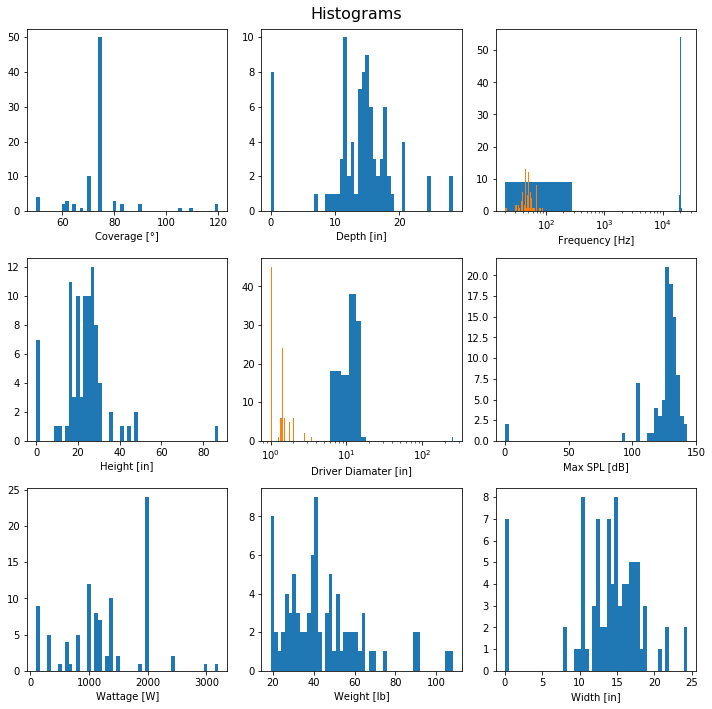

In [32]:
fig_feat, ax_feat = plt.subplots(3,3,figsize=(10,10))

ax_feat[0,0].hist(dfq['coverage'].astype(float),bins=50);
ax_feat[0,0].set_xlabel('Coverage [°]')

ax_feat[0,1].hist(dfq['depth'].astype(float),bins=50);
ax_feat[0,1].set_xlabel('Depth [in]')

ax_feat[0,2].hist(dfq['frequency_1'].astype(float),bins=100); #,range=(0.0, 200)
ax_feat[0,2].hist(dfq['frequency_0'].astype(float),bins=50);
ax_feat[0,2].set_xlabel('Frequency [Hz]')
ax_feat[0,2].semilogx()

ax_feat[1,0].hist(dfq['height'].astype(float),bins=50);
ax_feat[1,0].set_xlabel('Height [in]')

ax_feat[1,1].hist(dfq['lf driver'].astype(float),bins=100);
ax_feat[1,1].hist(dfq['hf driver'].astype(float),bins=50);
ax_feat[1,1].semilogx()
ax_feat[1,1].set_xlabel('Driver Diamater [in]')

ax_feat[1,2].hist(dfq['max spl'].astype(float),bins=50);
ax_feat[1,2].set_xlabel('Max SPL [dB]')

ax_feat[2,0].hist(dfq['wattage'].astype(float),bins=50);
ax_feat[2,0].set_xlabel('Wattage [W]')

ax_feat[2,1].hist(dfq['weight'].astype(float),bins=50);
ax_feat[2,1].set_xlabel('Weight [lb]')

ax_feat[2,2].hist(dfq['width'].astype(float),bins=50);
ax_feat[2,2].set_xlabel('Width [in]')

fig_feat.suptitle('Histograms',size=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)

Observations:

* Coverage: Looks reasonable, values within physical range.
* Depth : Has unphysical zero (0) values -> set to average.
* Frequency values: Outliers (high-f = 20 Hz), most likely mean 20,000 Hz.
* Height: Has unphysical zero (0) values -> set to average.
* Drivers (hf/lf) : values within range, except outlier at 250 in -> set to average
* Max SPL : Has unphysical zero (0) values -> set to average.
* Wattage : Looks reasonable, values within physical range.
* Weight : Looks reasonable, values within physical range.
* Width : Has unphysical zero (0) values ->  set to average. 

### Post-Processing

In [33]:
# Setting unphysical zero values to the average
dfq.loc[dfq['depth']==0,'depth']= dfq[dfq['depth']!=0]['depth'].mean()
dfq.loc[dfq['height']==0,'height']= dfq[dfq['height']!=0]['height'].mean()
dfq.loc[dfq['max spl']==0,'max spl']= dfq[dfq['max spl']!=0]['max spl'].mean()
dfq.loc[dfq['width']==0,'width']= dfq[dfq['width']!=0]['width'].mean()
dfq.loc[dfq['frequency_1']==20.0,'frequency_1'] = 20000.0
dfq.loc[dfq['lf driver']>50.0,'lf driver'] = dfq.loc[dfq['lf driver']<50.0,'lf driver'].mean()

In [34]:
# Make sure that all values are within a physically reasonable range

print('coverage_min:',dfq['coverage'].min())
print('coverage_max:',dfq['coverage'].max())
print('depth_min:',dfq['depth'].min())
print('depth_max:',dfq['depth'].max())
print('width_min:',dfq['width'].min())
print('width_max:',dfq['width'].max())
print('height_min:',dfq['height'].min())
print('height_max:',dfq['height'].max())
print('weight_min:',dfq['weight'].min())
print('weight_max:',dfq['weight'].max())
print('spl_min:',dfq['max spl'].min())
print('spl_max:',dfq['max spl'].max())
print('lf_min:',dfq['lf driver'].min())
print('lf_max:',dfq['lf driver'].max())
print('hf_min:',dfq['hf driver'].min())
print('hf_max:',dfq['hf driver'].max())
print('low-freq_min:',dfq['frequency_0'].min())
print('low-freq_max:',dfq['frequency_0'].max())
print('high-freq_min:',dfq['frequency_1'].min())
print('high-freq_max:',dfq['frequency_1'].max())

coverage_min: 50.0
coverage_max: 120.0
depth_min: 7.0
depth_max: 28.3
width_min: 7.91
width_max: 24.4
height_min: 9.05
height_max: 87.2
weight_min: 18.85
weight_max: 108.0
spl_min: 93.0
spl_max: 143.0
lf_min: 6.0
lf_max: 18.0
hf_min: 1.0
hf_max: 3.5
low-freq_min: 20.0
low-freq_max: 88.0
high-freq_min: 144.0
high-freq_max: 26000.0


Good!, no abnormally large or small values.

In [35]:
# Handle missing values

# for drivers, if there is a missing value the driver is probably absent, set to 0.0
dfq['hf driver'] =dfq['hf driver'].fillna(0.0)
dfq['lf driver'] =dfq['lf driver'].fillna(0.0)

# for all other quantities like depth, width or frequency, 
# it makes sense to set missing values to average of respective column.
dfq = dfq.fillna(dfq.mean())

# check if there are still unaccounted for values
dfq.isnull().values.any()

dfq.head()

,coverage,depth,frequency_0,frequency_1,height,hf driver,lf driver,max spl,wattage,weight,width
0,74.638554,14.200000,40.00000,20000.000000,24.100000,0.0,12.0,126.0,2000.0,35.000000,14.200000
1,74.638554,15.000000,40.00000,20000.000000,27.100000,0.0,15.0,127.0,2000.0,41.000000,16.500000
2,75.000000,13.800000,50.00000,20000.000000,23.700000,1.4,12.0,132.0,2000.0,47.800000,14.000000
3,74.638554,15.118625,50.98913,18929.173913,25.286667,1.4,15.0,127.2,2000.0,44.407356,14.858395
4,75.000000,15.118625,50.98913,18929.173913,25.286667,1.0,8.0,127.2,300.0,44.407356,14.858395


In [37]:
# Save to csv file
dfq.to_csv('dfmat.csv',index=False)

In [3]:
dfq = pd.read_csv('dfmat.csv')
#dfq.head()

### Feature Normalization 

In [40]:
### make normalized vectors for every entry. ###

# Mean-normalization
dfmat_norm = (dfq - dfq.mean()) / (dfq.max() - dfq.min())
print( 'entries:', len(dfmat_norm.index.values))
dfmat_norm.head()

entries: 106


,coverage,depth,frequency_0,frequency_1,height,hf driver,lf driver,max spl,wattage,weight,width
0,6.090366e-16,-4.312793e-02,-0.161605,4.141499e-02,-1.518447e-02,-0.357978,0.008333,-2.400000e-02,0.237725,-1.055228e-01,-3.992693e-02
1,6.090366e-16,-5.569249e-03,-0.161605,4.141499e-02,2.320324e-02,-0.357978,0.258333,-4.000000e-03,0.237725,-3.822049e-02,9.955154e-02
2,5.163511e-03,-6.190728e-02,-0.014546,4.141499e-02,-2.030284e-02,0.042022,0.008333,9.600000e-02,0.237725,3.805545e-02,-5.205549e-02
3,6.090366e-16,-1.667941e-16,0.000000,1.407015e-16,-9.092038e-17,0.042022,0.258333,-2.842171e-16,0.237725,3.188077e-16,1.077233e-16
4,5.163511e-03,-1.667941e-16,0.000000,1.407015e-16,-9.092038e-17,-0.072264,-0.325000,-2.842171e-16,-0.310662,3.188077e-16,1.077233e-16


## Visualizations & Explorations

In [41]:
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib notebook

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

import plotly.graph_objs as go

In [42]:
# Class will be used to easily draw arrows in 3D plots below

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

### Visualizing Vectors 

To visualize the vectors, since our senses only have access to three dimensions, we probe three dimensions at a time.
The following plots show all product vectors, as points in 3D space. To build the 3D space, we choose only 3 features of the products by index, using the idx_feat = [feature1, feature2, feature3].

<IPython.core.display.Javascript object>


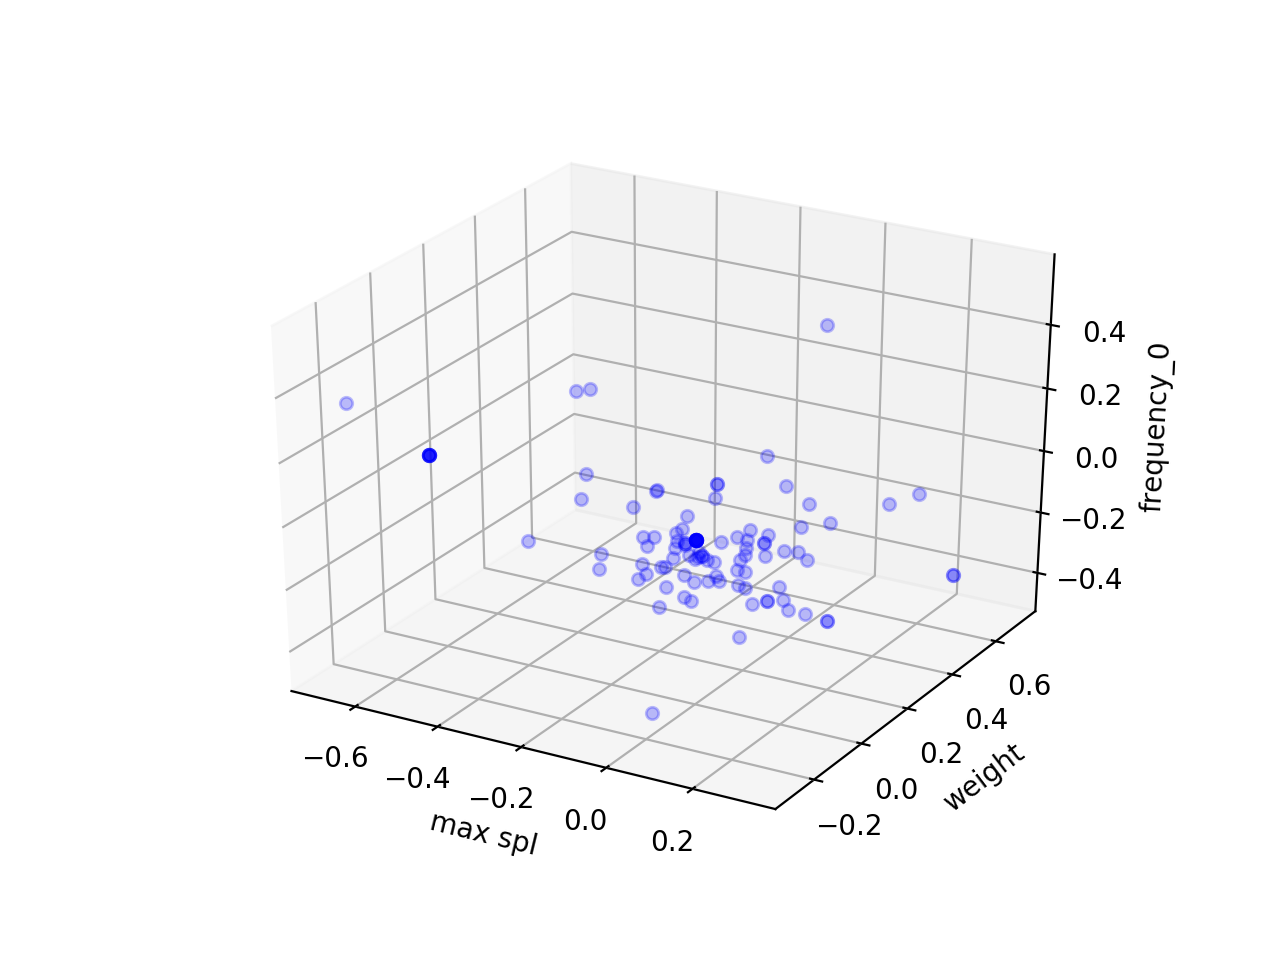

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')

idx_feat = [7,9,2]

mat = dfmat_norm.to_numpy()

for name in  dfr['name']:
    
    idx = dfr['name'][dfr['name']==name].index.values[0]
    #print(idx)
    xdata = [dfmat_norm.iloc[idx,idx_feat[0]]]
    ydata = [dfmat_norm.iloc[idx,idx_feat[1]]]
    zdata = [dfmat_norm.iloc[idx,idx_feat[2]]]
        
    ax.scatter3D(xdata, ydata, zdata, c='b',marker='o',alpha=0.25); 

ax.set_xlabel(dfmat_norm.columns[idx_feat[0]])
ax.set_ylabel(dfmat_norm.columns[idx_feat[1]])
ax.set_zlabel(dfmat_norm.columns[idx_feat[2]])
          
plt.show()

<IPython.core.display.Javascript object>


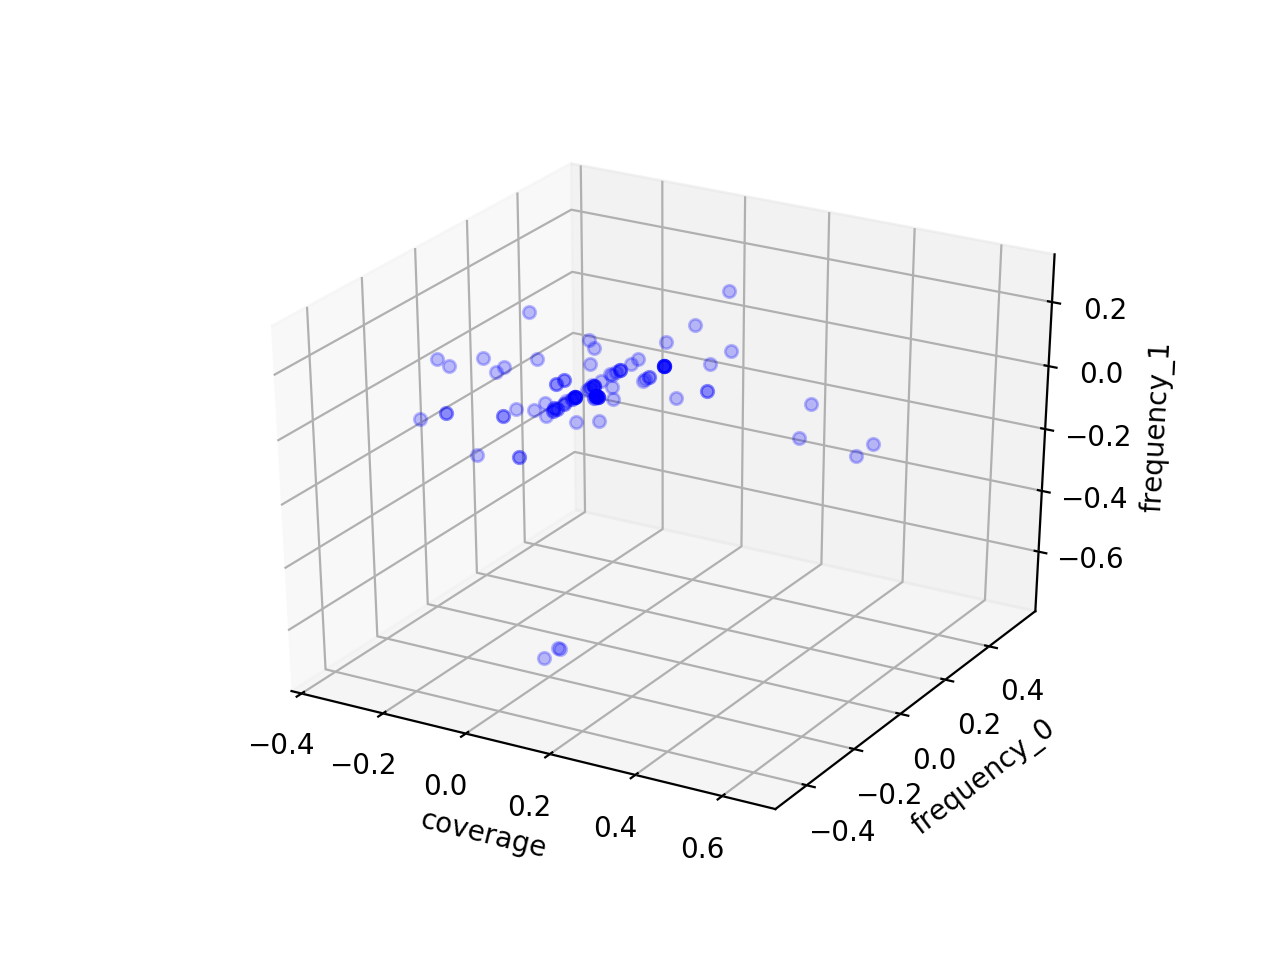

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')

idx_feat = [0,2,3]

mat = dfmat_norm.to_numpy()

for name in  dfr['name']:
    
    idx = dfr['name'][dfr['name']==name].index.values[0]
    #print(idx)
    xdata = [dfmat_norm.iloc[idx,idx_feat[0]]]
    ydata = [dfmat_norm.iloc[idx,idx_feat[1]]]
    zdata = [dfmat_norm.iloc[idx,idx_feat[2]]]
        
    ax.scatter3D(xdata, ydata, zdata, c='b',marker='o',alpha=0.25); 
    
ax.set_xlabel(dfmat_norm.columns[idx_feat[0]])
ax.set_ylabel(dfmat_norm.columns[idx_feat[1]])
ax.set_zlabel(dfmat_norm.columns[idx_feat[2]])
          
plt.show()

Playing around with several choices of indices, we find that most features are dispered around the [-1,1]x[-1,1]x[-1,1] grid box, not bunching up in particular regions (like the first example plot above). This is positive, as it indicates that there is enough separation between the products to justify distinguishing them by the chosen features. Other features such as coverage or high-frequency (frequency_1) show a bit more clustering, since these features have a couple of standard values across all products in the list - (see second exaxmple plot); we wouldn't want to base the recommender system solely on this parameters. Fortunately, the recommender system proposed uses all the features, and there are enough of them which are well separated to merit comparing their vectors to determine similarity.

## Recommender System Prototype

We are now ready to test a basic recommender system.

The user shall feed a list of items which are liked and disliked:

### Set User Likes/Dislikes

In [45]:
likes = [dfr.loc[34,'name'],dfr.loc[30,'name']] #, dfr.loc[12,'name'],dfr.loc[22,'name']
dislikes =  [dfr.loc[72,'name'],dfr.loc[20,'name']]#, dfr.loc[7,'name'],dfr.loc[70,'name']]

total = len(likes)+len(dislikes)

In an app this like/dislike selection would be interactive.

### Create Preference Vector

The (ideal) preference vector is the weighted average over all likes (+1) and dislikes (-1).
Essentially, it is a vector that tries to look as much as possible like the vectors for the 'liked' products, and be the least like the 'disliked' products. See visual below.

<IPython.core.display.Javascript object>


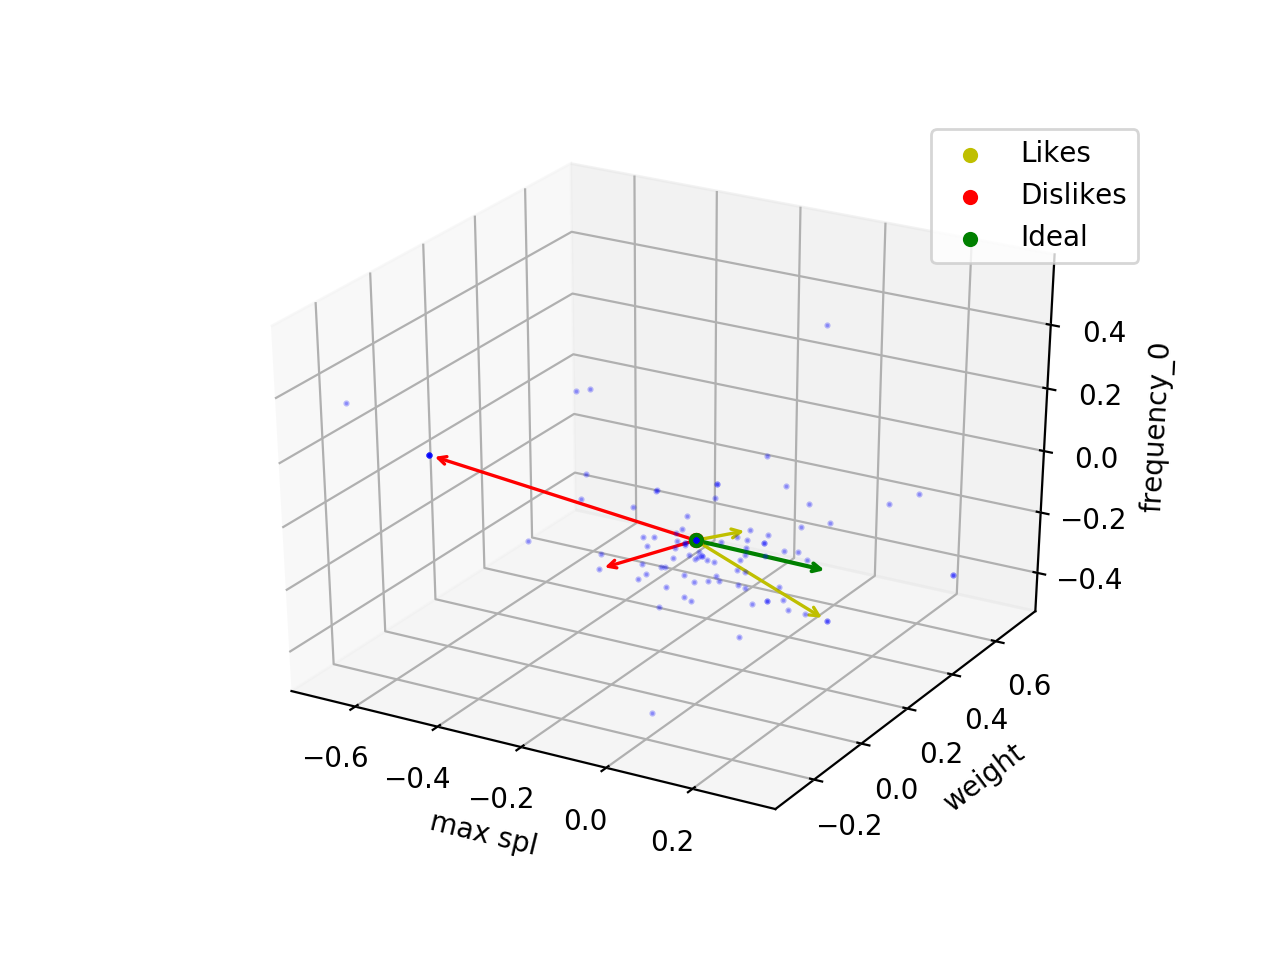

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')

idx_feat = [7,9,2] # pick some index features for visualization

vec = np.zeros((1,dfmat_norm.shape[1]))
mat = dfmat_norm.to_numpy()

ax.scatter3D([0], [0], [0], c='y', alpha=1.0,label = 'Likes');
ax.scatter3D([0], [0], [0], c='r', alpha=1.0,label = 'Dislikes');
ax.scatter3D([0], [0], [0], c='g', alpha=1.0,label = 'Ideal');

for name in  dfr['name']:
    
    idx = dfr['name'][dfr['name']==name].index.values[0]
    xdata = [dfmat_norm.iloc[idx,idx_feat[0]]]
    ydata = [dfmat_norm.iloc[idx,idx_feat[1]]]
    zdata = [dfmat_norm.iloc[idx,idx_feat[2]]]
    
    ax.scatter3D(xdata, ydata, zdata, c='b',marker='o',s=1.5,alpha=0.25); 
    
for name in likes:
    
    idx = dfr['name'][dfr['name']==name].index.values[0]
    
    vec += (1.0/total)*mat[idx,:]
    
    xdata = [dfmat_norm.iloc[idx,idx_feat[0]]]
    ydata = [dfmat_norm.iloc[idx,idx_feat[1]]]
    zdata = [dfmat_norm.iloc[idx,idx_feat[2]]]
    
    arw = Arrow3D([0,xdata[0]],[0,ydata[0]],[0,zdata[0]], arrowstyle="->", color="y", lw = 1.2, mutation_scale=8)
    ax.add_artist(arw)
    
for name in dislikes:

    idx = dfr['name'][dfr['name']==name].index.values[0]
    
    vec -= (1.0/total)*mat[idx,:]
    
    xdata = [dfmat_norm.iloc[idx,idx_feat[0]]]
    ydata = [dfmat_norm.iloc[idx,idx_feat[1]]]
    zdata = [dfmat_norm.iloc[idx,idx_feat[2]]]
    
    arw = Arrow3D([0,xdata[0]],[0,ydata[0]],[0,zdata[0]], arrowstyle="->", color="r", lw = 1.2, mutation_scale=7)
    ax.add_artist(arw)
             
# Final vector
xdata = [vec[0,idx_feat[0]]]
ydata = [vec[0,idx_feat[1]]]
zdata = [vec[0,idx_feat[2]]]

arw = Arrow3D([0,xdata[0]],[0,ydata[0]],[0,zdata[0]], arrowstyle="->", color="g", lw = 1.5, mutation_scale=7)
ax.add_artist(arw)

ax.set_xlabel(dfmat_norm.columns[idx_feat[0]])
ax.set_ylabel(dfmat_norm.columns[idx_feat[1]])
ax.set_zlabel(dfmat_norm.columns[idx_feat[2]])
          
plt.legend()
plt.show()

### Compare, Rank, Recommend

We use the preference vector from the example above to generate a ranked list of recommendations based on Cosine and Euclidean similarity methods.

#### Cosine Similarity

Cosine similarity compares vectors by the angles between them; that is, how close they are in terms of directionality. In this context, two vectors which are 'cosine-similar' share a similar proportion of features (a balance so to speak), and the scale of the features is not as important as the ratios of specs. For example, if a buyer wants to try a larger speaker with the same balance of features, cosine similarity will be helpful.

In [47]:
def cossim (v1,v2):
    return np.dot(v1,v2)/(np.sqrt(np.dot(v1,v1)*np.dot(v2,v2)))

In [48]:
score_list = []
for name in dfr['name']:
    
    if (name not in likes) and (name not in dislikes) : # we must recommend things consumers have not tried
        
        idx = dfr['name'][dfr['name']==name].index.values[0]
        v1 = vec.flatten()
        v2 = mat[idx,:].flatten()
        
        score_list.append((idx,cossim(v1,v2)))
        
sorted_scores_cossim = sorted(score_list, key=lambda x: x[1],reverse=True)

# print top recommendations:

print('Recommendations (Cossim):')
counter = 0
scores_cossim_array = np.zeros(len(sorted_scores_cossim))
for idx, score in sorted_scores_cossim:

    score_norm = 100*(score+1)/2
    scores_cossim_array[counter] = score_norm
    
    if counter < 10:
        print(str(counter+1), ' : ', " ".join(dfr.loc[idx,'name'].split()[0:5]), ', score = ' , str(int(np.round(score_norm,0)))+'%')
    
    counter += 1

Recommendations (Cossim):
1  :  Yamaha DZR15 2,000W 15" 2-way , score =  96%
2  :  Yamaha DZR315-D 2000W Powered Speaker , score =  96%
3  :  Yamaha DZR315 3-Way Powered Speaker , score =  96%
4  :  Mackie SRM215 V-Class 2,000W 15″ , score =  93%
5  :  RCF Art 735-A MK4 15 , score =  91%
6  :  RCF Art 715-A MK4 15 , score =  89%
7  :  RCF Art 745-A MK4 15 , score =  88%
8  :  Electro-Voice ETX-15P 15" Two-Way Powered , score =  87%
9  :  Turbosound Milan M15 Powered 15 , score =  87%
10  :  Yamaha DZR12-D 2000W Powered Speaker , score =  82%


<IPython.core.display.Javascript object>


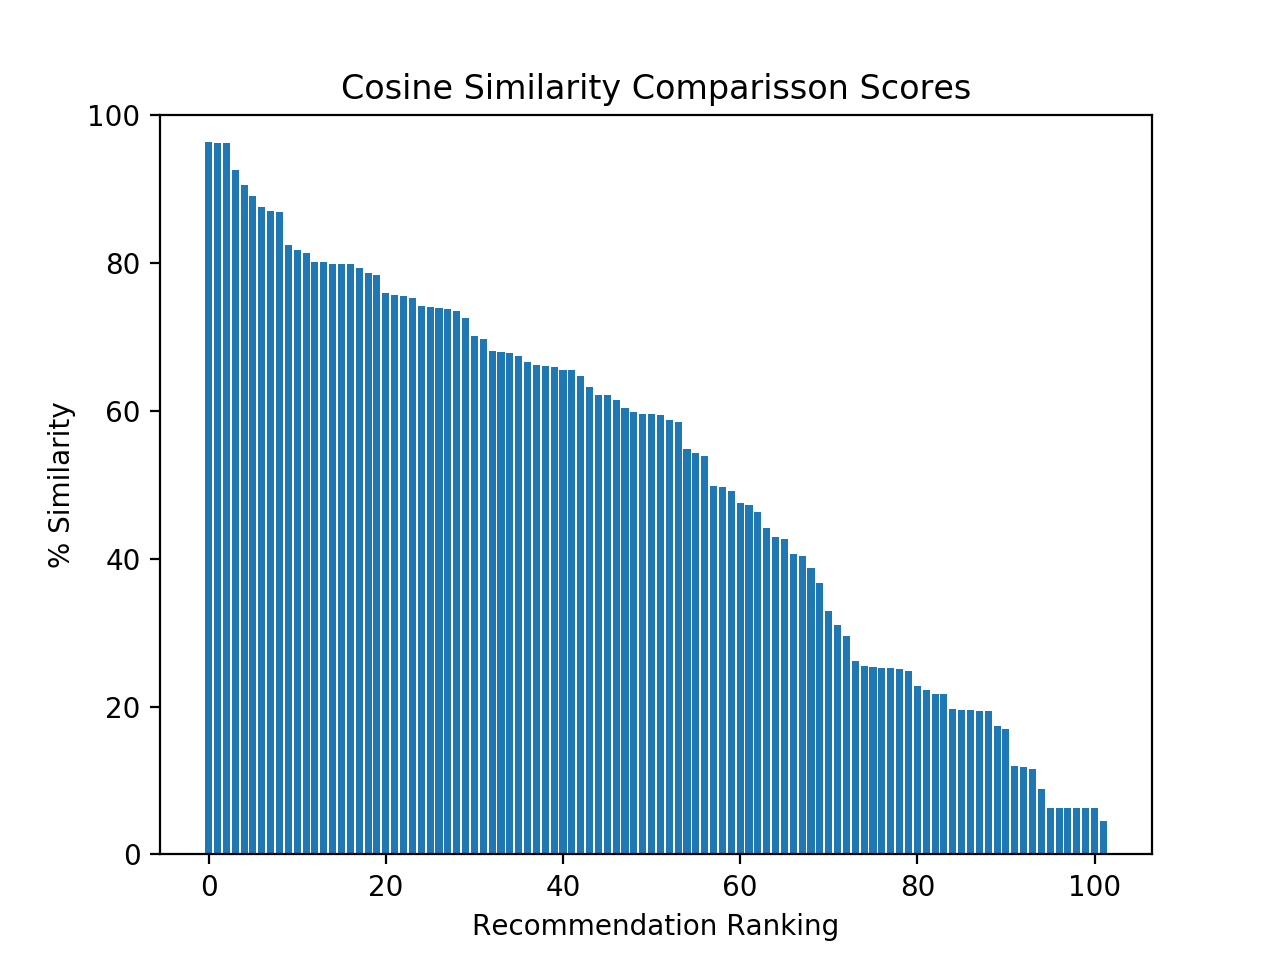

(0, 100)

In [49]:
fig_cossim = plt.figure()

plt.bar(range(len(scores_cossim_array)),scores_cossim_array)
plt.xlabel('Recommendation Ranking')
plt.ylabel('% Similarity')
plt.title('Cosine Similarity Comparisson Scores')
plt.ylim((0,100))

#### Euclidean Similarity

Euclidean similarity compares vectors by the Euclidean distance between them; that is, they are close in spatial position. In this context, two vectors which are 'Euclidean-similar' share similar exact ranges of features (features tend to have similar values), and the scale of the features plays a more important role compared to the ratios of specs. For example, if a buyer wants to replace a speaker with a good equivalent, Euclidean similarity will be helpful.

In [50]:
def eucsim (v1,v2):
    return np.sqrt(np.dot(v1-v2,v1-v2))

In [51]:
score_list = []
for name in dfr['name']:
    
    if (name not in likes) and (name not in dislikes) : # we must recommend things consumers have not tried
        
        idx = dfr['name'][dfr['name']==name].index.values[0]
        v1 = vec.flatten()
        v2 = mat[idx,:].flatten()
        
        score_list.append((idx,eucsim(v1,v2)))
        
#print(sorted(score_list, key=lambda x: x[1],reverse=True))
sorted_scores_eucsim = sorted(score_list, key=lambda x: x[1],reverse=False)

print('Recommendations (Euclidean):')
counter = 0
scores_eucsim_array = np.zeros(len(sorted_scores_eucsim))

for idx, score in sorted_scores_eucsim:

    score_norm = score
    scores_eucsim_array[counter] = score_norm
    if counter < 10:
        print(str(counter+1), ' : ', dfr.loc[idx,'name'], ', score = ' , str(np.round(score_norm,2))+' dist. units')
    
    counter += 1

Recommendations (Euclidean):
1  :  Yamaha DZR15 2,000W 15" 2-way Powered Speaker , score =  0.24 dist. units
2  :  Mackie SRM215 V-Class 2,000W 15″ Powered Speaker , score =  0.35 dist. units
3  :  Yamaha DZR315-D 2000W Powered Speaker with Dante , score =  0.42 dist. units
4  :  Yamaha DZR315 3-Way Powered Speaker , score =  0.42 dist. units
5  :  RCF Art 735-A MK4 15 in. 2-way Active Speaker , score =  0.42 dist. units
6  :  Electro-Voice ETX-15P 15" Two-Way Powered Loudspeaker , score =  0.44 dist. units
7  :  RCF Art 715-A MK4 15 in. Active 2-Way Speaker , score =  0.44 dist. units
8  :  Turbosound Milan M15 Powered 15 in. Loudspeaker with KLARK TEKNIK DSP , score =  0.44 dist. units
9  :  RCF Art 745-A MK4 15 in. Active 2-Way Speaker , score =  0.45 dist. units
10  :  Yamaha DZR12-D 2000W Powered Speaker with Dante , score =  0.49 dist. units


<IPython.core.display.Javascript object>


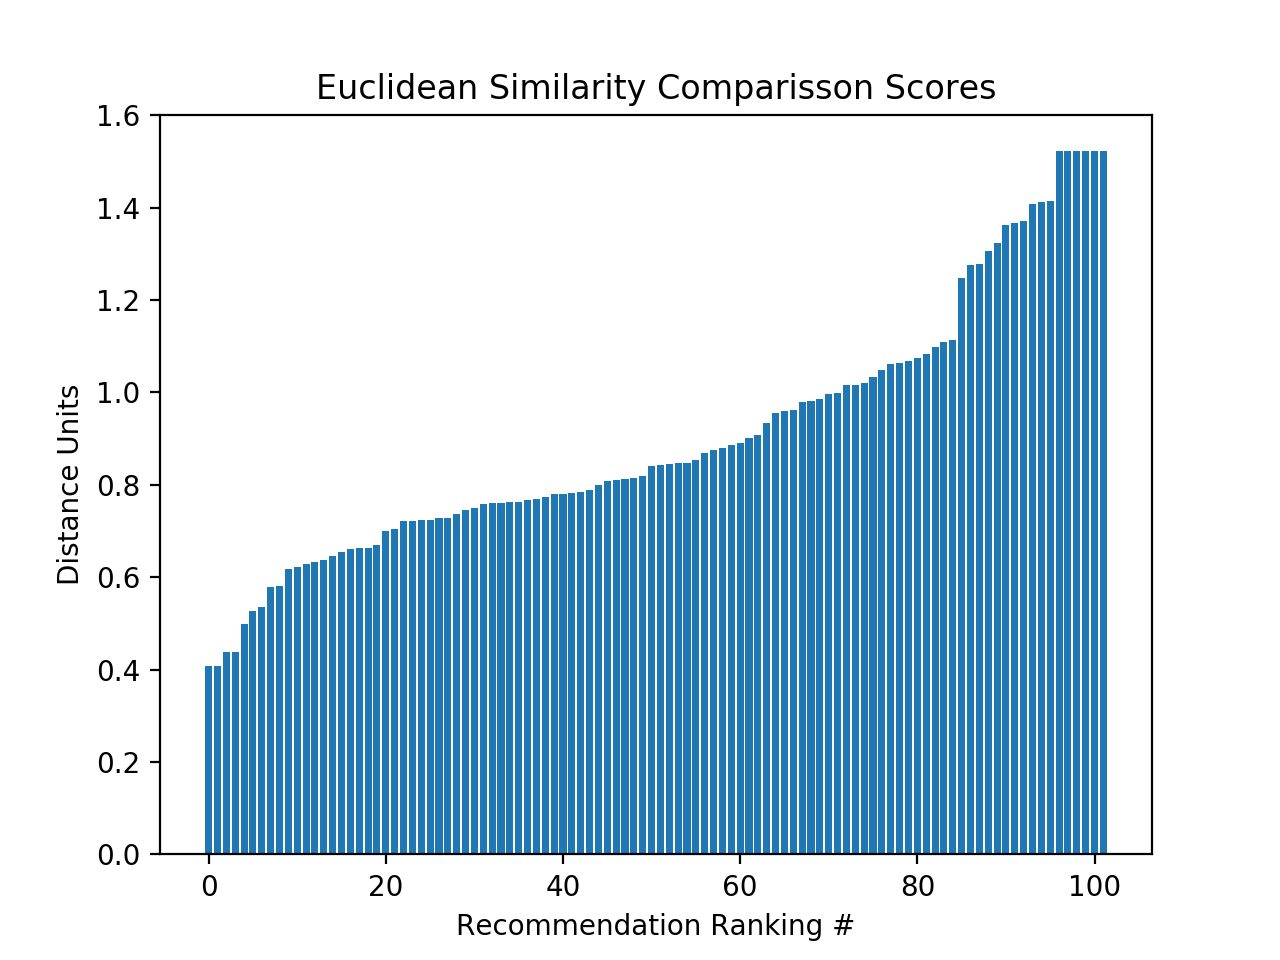

(0, 1.6)

In [317]:
fig_cossim = plt.figure()

plt.bar(range(len(scores_eucsim_array)),scores_eucsim_array)
plt.xlabel('Recommendation Ranking #')
plt.ylabel('Distance Units')
plt.title('Euclidean Similarity Comparisson Scores')
plt.ylim((0,1.6))

## Preliminary Validation

To validate the recommender system, we would like to compare it other recommender systems. 

As a test, we focus on the 'similar items' recommendation given in product pages by Guitar Center. Below we have listed some products in our dataframe, together with 3 similar products recommended by Guitar Center.

In [92]:
GCrec = pd.DataFrame(dict({'name': ['QSC K12.2 Powered 12" 2-way Loudspeaker System with Advanced DSP', 'Harbinger VARI V2312 12" 2,000W Powered Speaker with Bluetooth','Harbinger VARI V2315 15" Powered Speaker with Bluetooth'],\
                       'sim_1': ['K10.2 Powered 10" 2-way Loudspeaker System with Advanced DSP','VARI V2315 15" Powered Speaker with Bluetooth Black','VARI V2312 12" 2,000W Powered Speaker with Bluetooth Black'], \
                       'sim_2': ['CP12 12" Powered Speaker','TS312 12" 2-Way Powered Loudspeaker','TS315 15" 2-Way Powered Loudspeaker'] , \
                       'sim_3': ['VARI V2312 12" 2,000W Powered Speaker with Bluetooth Black','VARI V2212 600W 12" Two-Way Class-D Loudspeaker','VARI V2215 600W 15" 2-Way Class D Loudspeaker']}))

rows = GCrec.index.tolist()
rows = rows[-1:]+rows[:-1]
rows = rows[-1:]+rows[:-1]
GCrec = GCrec.loc[rows]
GCrec.reset_index(drop=True,inplace=True)
GCrec.head()

,name,sim_1,sim_2,sim_3
0,"Harbinger VARI V2312 12"" 2,000W Powered Speake...","VARI V2315 15"" Powered Speaker with Bluetooth ...","TS312 12"" 2-Way Powered Loudspeaker","VARI V2212 600W 12"" Two-Way Class-D Loudspeaker"
1,"Harbinger VARI V2315 15"" Powered Speaker with ...","VARI V2312 12"" 2,000W Powered Speaker with Blu...","TS315 15"" 2-Way Powered Loudspeaker","VARI V2215 600W 15"" 2-Way Class D Loudspeaker"
2,"QSC K12.2 Powered 12"" 2-way Loudspeaker System...","K10.2 Powered 10"" 2-way Loudspeaker System wit...","CP12 12"" Powered Speaker","VARI V2312 12"" 2,000W Powered Speaker with Blu..."


In [93]:
# Show Indices of the
print(dfr[dfr['name']==GCrec.loc[0,'name']].index.values)
print(dfr[dfr['name']==GCrec.loc[1,'name']].index.values)
print(dfr[dfr['name']==GCrec.loc[2,'name']].index.values)

[0]
[1]
[2]


Lets see if we can find some of these recommended items in our data frame and visualize to get a sense of what comparisson measure Guitar Center is utilizing.

For this example (and trying different feature combinations), it appears that Guitar Center's recommendation picks out some features as above and recommends products that are similar based on those features. This is not the case for all features combinations as shown below:

<IPython.core.display.Javascript object>


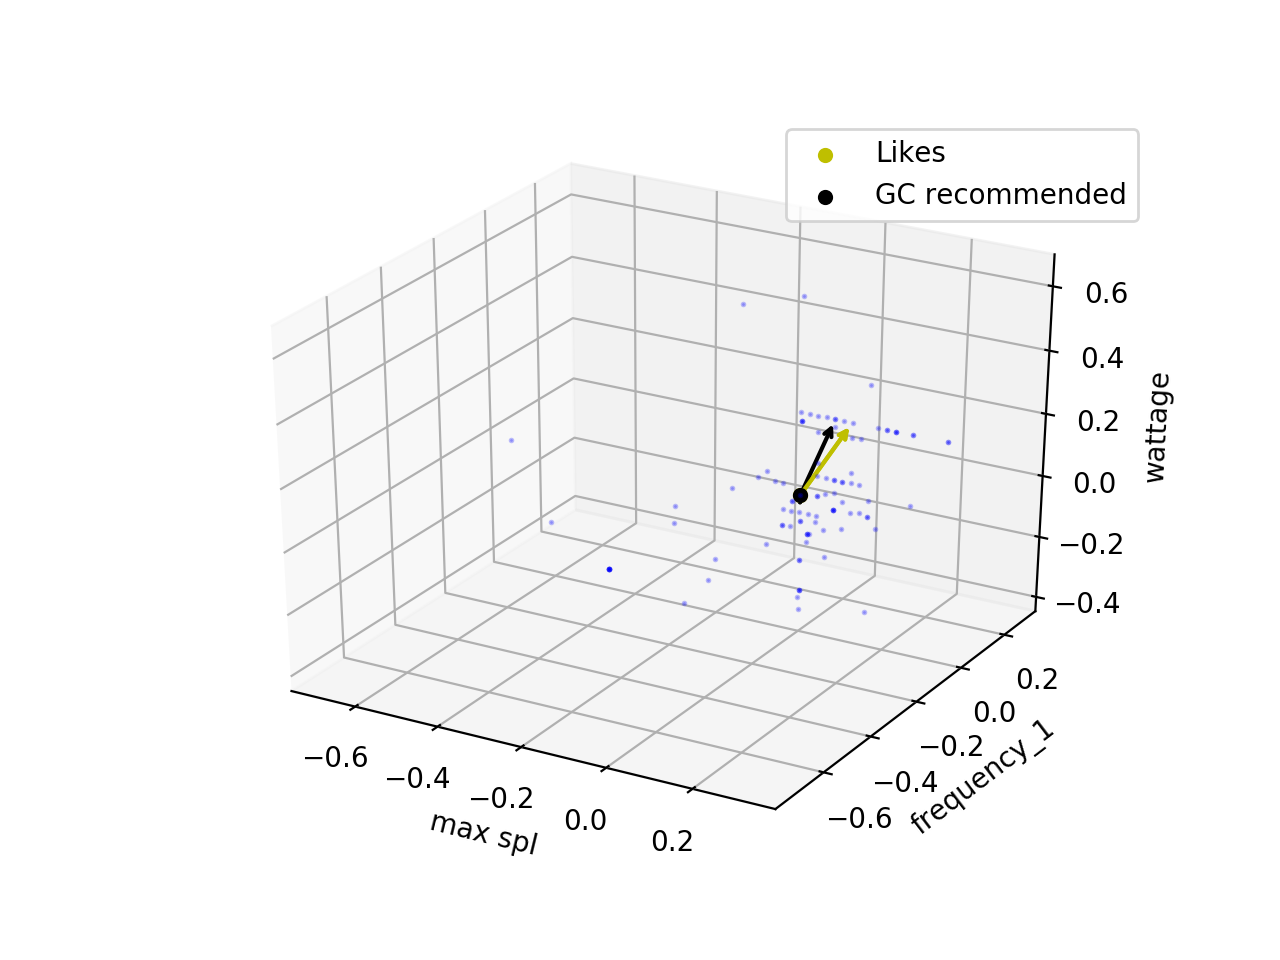

In [119]:
likes = [dfr.loc[2,'name']]
dislikes =  []

total = len(likes)+len(dislikes)

fig1 = plt.figure()
ax = plt.axes(projection='3d')

idx_feat = [7,3,8]

vec = np.zeros((1,dfmat_norm.shape[1]))
mat = dfmat_norm.to_numpy()

ax.scatter3D([0], [0], [0], c='y', alpha=1.0,label = 'Likes');
ax.scatter3D([0], [0], [0], c='k', alpha=1.0,label = 'GC recommended');

#print(GCrec['name'][0])
#print(dfr['name'].values)

for name in dfr['name']:
    
    idx = dfr['name'][dfr['name']==name].index.values[0]
    
    xdata = [dfmat_norm.iloc[idx,idx_feat[0]]]
    ydata = [dfmat_norm.iloc[idx,idx_feat[1]]]
    zdata = [dfmat_norm.iloc[idx,idx_feat[2]]]
  
    ax.scatter3D(xdata, ydata, zdata, c='b',marker='o',alpha=0.25, s=1.0); #, cmap='Greens'
    
for name in likes:
    
    idx = dfr['name'][dfr['name']==name].index.values[0]
    
    vec += (1.0/total)*mat[idx,:]
    
    xdata = [dfmat_norm.iloc[idx,idx_feat[0]]]
    ydata = [dfmat_norm.iloc[idx,idx_feat[1]]]
    zdata = [dfmat_norm.iloc[idx,idx_feat[2]]]
    
    arw = Arrow3D([0,xdata[0]],[0,ydata[0]],[0,zdata[0]], arrowstyle="->", color="y", lw = 1.5, mutation_scale=7)
    ax.add_artist(arw)

    if name in (GCrec['name'].values):
        
        idx_name = GCrec['name'][GCrec['name']==name].index.values[0]
        #print('there is info to compare!')
        
        for i in range(1,3):
            
            col = 'sim_' + str(i)
            name2 = GCrec.loc[idx_name,col]
            
            
            for dfr_name in dfr['name'].values:
                if name2 in dfr_name:
                
                    #print('info is in assembled dataframe!')

                    idx = dfr['name'][dfr['name']==dfr_name].index.values[0]

                    xdata = [dfmat_norm.iloc[idx,idx_feat[0]]]
                    ydata = [dfmat_norm.iloc[idx,idx_feat[1]]]
                    zdata = [dfmat_norm.iloc[idx,idx_feat[2]]]

                    arw = Arrow3D([0,xdata[0]],[0,ydata[0]],[0,zdata[0]], arrowstyle="->", color="k", lw = 1.5, mutation_scale=7)
                    ax.add_artist(arw)
    
for name in dislikes:

    idx = dfr['name'][dfr['name']==name].index.values[0]
    
    vec -= (1.0/total)*mat[idx,:]
    
    xdata = [dfmat_norm.iloc[idx,idx_feat[0]]]
    ydata = [dfmat_norm.iloc[idx,idx_feat[1]]]
    zdata = [dfmat_norm.iloc[idx,idx_feat[2]]]
    
    arw = Arrow3D([0,xdata[0]],[0,ydata[0]],[0,zdata[0]], arrowstyle="->", color="r", lw = 1.5, mutation_scale=7)
    ax.add_artist(arw)
    
             
# final vector
xdata = [vec[0,idx_feat[0]]]
ydata = [vec[0,idx_feat[1]]]
zdata = [vec[0,idx_feat[2]]]

arw = Arrow3D([0,xdata[0]],[0,ydata[0]],[0,zdata[0]], arrowstyle="->", color="y", lw = 1.5, mutation_scale=7)
ax.add_artist(arw)

ax.set_xlabel(dfmat_norm.columns[idx_feat[0]])
ax.set_ylabel(dfmat_norm.columns[idx_feat[1]])
ax.set_zlabel(dfmat_norm.columns[idx_feat[2]])

          
plt.legend()
plt.show()

Guitar Center may not be using the full feature space to make recommendations. In addition, when it does base a recommendation on certain features, the Euclidean distance (and not the angular similarity) between features appears to a determining factor in that system. Since our recommendation system uses a high-dimensional feature and is not restricted to Euclidean similarity, it has the potential to outperform the system used by Guitar Center. 

## Conclusions & Outlook

We built a prototype for the speaker recommender system and established its viability. 

To complete the recommender system, we shall:
* Collect a larger dataset
* Undergo more extensive cleaning
* Validate it with statistical tests against several other recommender systems
* Create an interactive web application for users, including selection options (e.g. price ranges, brands, etc...)